In [1]:
%matplotlib notebook
import lalsimulation,lal
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [2]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance = 500.0*lal.PC_SI
spin1_z = 0.
spin2_z =  0.
deltaT = 1./16384.
omega220_theor = 1123.5069271284310162
tau220_theor = 1./173.3968451846601795
omega210_theor = 964.6776207864362505
tau210_theor = 1./175.9653077165579305
omega330_theor = 1781.0465134410869723
tau330_theor = 1./177.9760463156193850
omega440_theor = 2412.2798579678869828
tau440_theor = 1./180.9814369861043417
omega550_theor = 3030.4686619613758012
tau550_theor = 1./182.7198010010346820

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


<IPython.core.display.Javascript object>


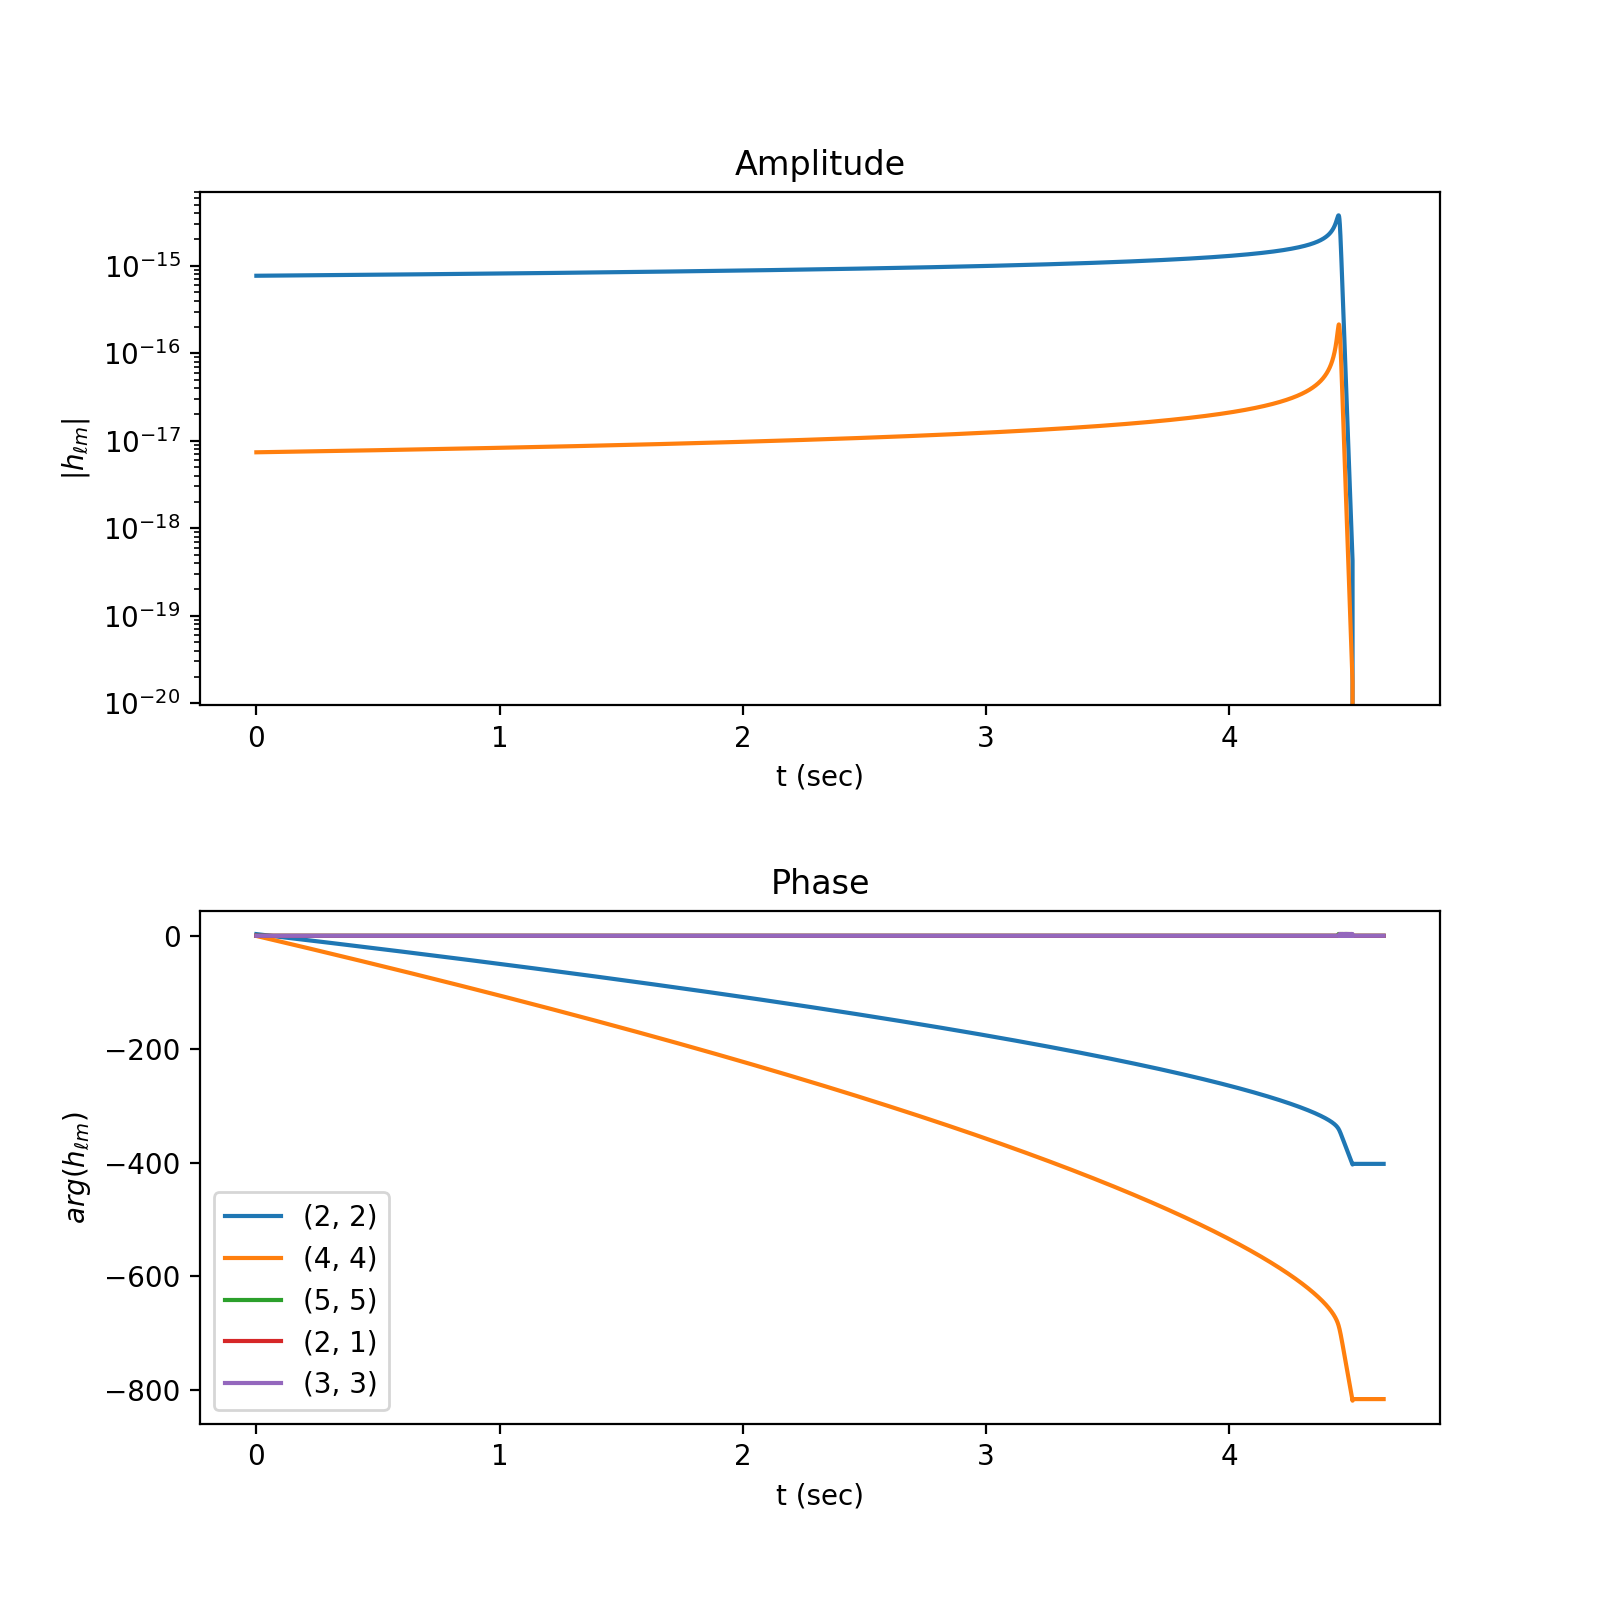

/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
sphtseries, dyn, dynHi = lalsimulation.SimIMRSpinAlignedEOBModes(deltaT, m1, m2, f_start22, distance, spin1_z, spin2_z,41, 0., 0., 0.,0.,0.,0.,0.,0.,1.,1., omega220_theor, tau220_theor, omega210_theor, tau210_theor, omega330_theor, tau330_theor, omega440_theor, tau440_theor, omega550_theor, tau550_theor, nqcCoeffsInput, 0)

hlm = {}

##55 mode
modeL = sphtseries.l
modeM = sphtseries.m
print 'Loading mode', modeL, modeM
h55 = sphtseries.mode.data.data #This is h_55
hlm[(modeL, modeM)] = h55

##44 mode
modeL = sphtseries.next.l
modeM = sphtseries.next.m
print 'Loading mode', modeL, modeM
h44 = sphtseries.next.mode.data.data #This is h_44
hlm[(modeL, modeM)] = h44

##21 mode
modeL = sphtseries.next.next.l
modeM = sphtseries.next.next.m
print 'Loading mode', modeL, modeM
h21 = sphtseries.next.next.mode.data.data #This is h_21
hlm[(modeL, modeM)] = h21

##33 mode
modeL = sphtseries.next.next.next.l
modeM = sphtseries.next.next.next.m
print 'Loading mode', modeL, modeM
h33 = sphtseries.next.next.next.mode.data.data #This is h_33
hlm[(modeL, modeM)] = h33

##22 mode
modeL = sphtseries.next.next.next.next.l
modeM = sphtseries.next.next.next.next.m
print 'Loading mode', modeL, modeM
h22 = sphtseries.next.next.next.next.mode.data.data #This is h_22
hlm[(modeL, modeM)] = h22

##time array (s)
time_array = np.arange(0,len(h22)*deltaT,deltaT)

plt.figure(figsize=(8,8))
for mode in hlm.keys():
    plt.subplot(211)
    plt.semilogy(time_array,np.abs(hlm[mode]), label=str(mode))
    plt.xlabel('t (sec)')
    plt.ylabel('$|h_{\ell m}|$')
    plt.title('Amplitude') 
    plt.subplot(212)
    plt.plot(time_array,np.unwrap(np.angle(hlm[mode])), label=str(mode))
    plt.xlabel('t (sec)')
    plt.ylabel('$arg(h_{\ell m})$')
    plt.title('Phase') 
plt.xlabel('t (sec)')   
plt.legend()
plt.subplots_adjust(hspace=0.4)
plt.show()    

In [1]:
inclination = 0.

paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertOmega220(paramdict, omega220_theor)
lalsimulation.SimInspiralWaveformParamsInsertTau220(paramdict, tau220_theor)
lalsimulation.SimInspiralWaveformParamsInsertOmega210(paramdict, omega210_theor)
lalsimulation.SimInspiralWaveformParamsInsertTau210(paramdict, tau210_theor)
lalsimulation.SimInspiralWaveformParamsInsertOmega330(paramdict, omega330_theor)
lalsimulation.SimInspiralWaveformParamsInsertTau330(paramdict, tau330_theor)
lalsimulation.SimInspiralWaveformParamsInsertOmega440(paramdict, omega440_theor)
lalsimulation.SimInspiralWaveformParamsInsertTau440(paramdict, tau440_theor)
lalsimulation.SimInspiralWaveformParamsInsertOmega550(paramdict, omega550_theor)
lalsimulation.SimInspiralWaveformParamsInsertTau550(paramdict, tau550_theor)

hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data

plt.subplot(211)
plt.semilogy(time_array, np.abs(h))
plt.xlabel('t (sec)')
plt.ylabel('$|h|$')
plt.title('Amplitude') 
plt.subplot(212)
plt.plot(time_array,np.unwrap(np.angle(h)))
plt.xlabel('t (sec)')
plt.ylabel('$arg(h)$')
plt.title('Phase') 
plt.xlabel('t (sec)')   
plt.legend()
plt.subplots_adjust(hspace=0.6)
plt.show()

NameError: name 'lal' is not defined